```
 This notebook contains summary statistics for the drugs.com depression drug reviews dataset. 
 In particular, it contains the following:

Summary stats:
    - Total number of reviews
    - Total number of reviews per rating
    - Total number of reviews per duration
    - Total number of unique drugs
    - Average length of comments
    - Average length of comments per rating
    - Average rating
    - Average number of upvotes
    - Average number of upvotes per rating
    - Highest length comment
    - Highest upvote count review

Subpopulations to look at:
    - Reviews with comments longer than 300 characters (arbitrary number)
    - Reviews with more than 15 upvotes (arbitrary number)
    
Relationships of interest
    - Length of review vs number of upvotes
    - Length of review vs rating
    - Upvotes vs time a review has been up (current date minus review date)
      (so we can see upvotes per review "duration", essentially)
```

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

In [20]:
df = pd.read_csv('./data/ddc_depression_drug_reviews.csv')
df = df[pd.notnull(df['genRating'])] #bye bye non-rated reviews!
df['comment length'] = df['comment'].apply(lambda x: len(x)) #let's look at this, too

In [3]:
# Summary statistics for the whole dataset
df.describe()

,genRating,upVotes,comment length
count,8479.000000,8479.000000,8479.000000
mean,7.023470,46.272202,490.964029
std,3.110536,55.512270,236.728944
min,1.000000,0.000000,6.000000
25%,5.000000,15.000000,296.000000
50%,8.000000,29.000000,517.000000
75%,10.000000,59.000000,713.000000
max,10.000000,1291.000000,3000.000000


In [17]:
# The longest comment
df[df['comment length'] == 3000].values[0][0]

'"•\t19 Apr. 2016\r\n\r\nBegan initial dose at 2230 hours. Felt the medicine working within a ½ hour. Was in a good mood as I had been taken off of Warfarin this date. Before drifting off to sleep, I glanced at the clock. It was approx. 2300 hrs. I had an odd feeling in my throat that was possibly closing up. I remember worrying what is going on here? As the feeling in my throat persisted, I also felt my “Adam’s apple” fluttering and an elevated heart rate. I soon fell asleep. No other meds taken except for Atorvastatin.\r\n\r\n•\t20 Apr. 2016  \r\n\r\nI awoke a 0600 hours to go to the bathroom. Upon arising, I felt a damp spot at the back of my underwear. Pulled the sheets back a discovered I had Shit the bed in my sleep. Felt real dizzy and drowsy. Thought to myself “how & why?” this happened. Went to shower.\r\n\r\nAs the morning continued on at 0630, the side effects were evident:\r\n1.\t“Hot flashes” Absolutely miserable. Could not get / stay comfortable. Firstly, had the flushing

In [19]:
# The shortest comment
df[df['comment length'] == 6].values[0][0]

'"Good"'

In [5]:
# The most upvoted comment
df[df['upVotes'] == 1291].values[0][0]

'"I remember reading people\'s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I\'m on 100mg and I don\'t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don\'t listen to all the negativity because what doesn\'t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see "butterflies and roses", its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it\'s up to people to take control to make a change. I did so by getting on this pill."'

In [24]:
# Not very correlated...
df['upVotes'].corr(df['comment length'])

0.12133037093497469

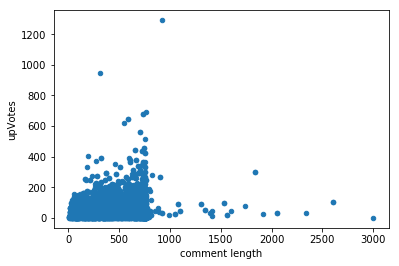

In [23]:
df.plot.scatter(x='comment length', y='upVotes')

In [26]:
# These aren't particularly correlated, either.
df['genRating'].corr(df['comment length'])

0.11667700197966514

In [6]:
comments = df['comment'].tolist()
ratings = df['genRating'].tolist()

In [7]:
def get_wordcounts(text, vectorizer=None):
    """
    Takes a string or list of strings and returns term frequencies for each word in
    a vectorizer's vocabulary. If no vectorizer is passed, the vocabulary will be generated
    from the input text's unigrams and bigrams.
    """
    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
        vectorizer.fit(text)
    term_counts = zip(vectorizer.get_feature_names(),
        np.asarray(vectorizer.transform(text).sum(axis=0)).ravel())
    return sorted(term_counts, key=lambda x: x[1], reverse=True)

def get_tfidf_weights(text, vectorizer=None):
    if vectorizer is None:
        vectorizer = TfidfVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
        vectorizer.fit(text)
    tfidf_weights = zip(vectorizer.get_feature_names(),
        np.asarray(vectorizer.transform(text).sum(axis=0)).ravel())
    return sorted(tfidf_weights, key=lambda x: x[1], reverse=True)

In [8]:
count_vec = CountVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
count_vec.fit(comments)

tfidf_vec = TfidfVectorizer(stop_words='english', min_df = 2, lowercase=True, ngram_range=(1,2))
tfidf_vec.fit(comments)

test_counts = get_wordcounts(comments, count_vec)[:10]
test_tfidf = get_tfidf_weights(comments, tfidf_vec)[:10]

In [16]:
for x in range(1,11):
    df_slice = df[df['genRating'] == x]
    print('Summary stats for reviews with a rating of {} \n'.format(x))
    print(df_slice.describe())
    print()
    coms = df_slice['comment'].tolist()
    top_words_tfidf = get_tfidf_weights(coms, tfidf_vec)[:10]
    print('Top words (by tf-idf) for reviews with a rating of {} \n'.format(x))
    print(str(top_words_tfidf))
    print()
    top_words = get_wordcounts(coms, count_vec)[:10]
    print('Top words (by raw count) for reviews with a rating of {} \n'.format(x))
    print(str(top_words))
    print()
    print('********************************************************************')
    print('********************************************************************')
    print()

Summary stats for reviews with a rating of 1 

       genRating      upVotes  comment length
count     1000.0  1000.000000     1000.000000
mean         1.0    22.161000      425.195000
std          0.0    21.210256      263.101489
min          1.0     0.000000       14.000000
25%          1.0    11.000000      213.250000
50%          1.0    18.000000      404.500000
75%          1.0    27.000000      675.750000
max          1.0   275.000000     3000.000000

Top words (by tf-idf) for reviews with a rating of 1 

[('drug', 20.123605083479458), ('felt', 17.034967753332761), ('worse', 17.017746993164881), ('took', 16.642837234012184), ('taking', 16.23473047022696), ('like', 15.668229624026008), ('depression', 15.537831707757682), ('day', 15.448916868572429), ('didn', 14.38619310549794), ('medication', 14.214277302763881)]

Top words (by raw count) for reviews with a rating of 1 

[('depression', 434), ('taking', 401), ('day', 373), ('felt', 352), ('drug', 339), ('like', 337), ('anxiety', 3